# Regressor Model for Sales Prediciton 


## Business Objective : To predict the sales of different item on the basis of there perevious sales data 

### Loading Library

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

### Loading Data

In [79]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df1=df.copy() # to use in ml

In [80]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
df.shape

(14204, 12)

In [82]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [83]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## checking if there is any missing values

In [84]:
df.isnull().sum()    

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### As we can see Missing values in target variable so not doing any missing value treatment 

# EDA

### Univariate Analysis

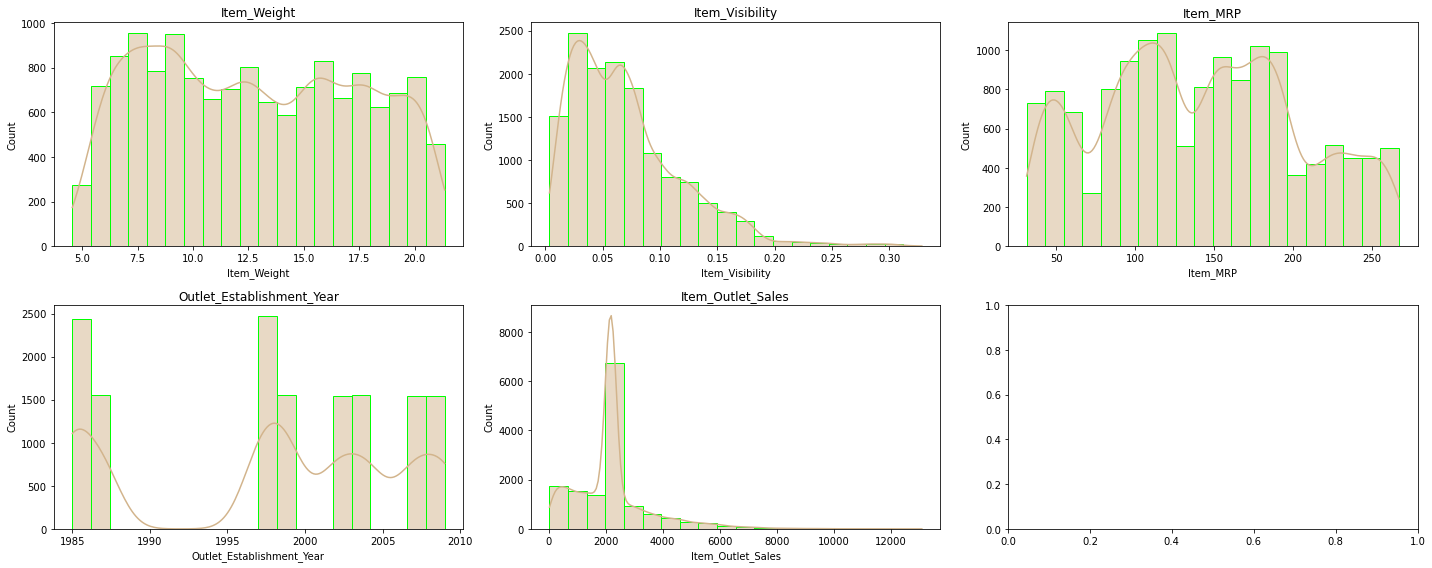

In [88]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=df.select_dtypes(include=numerics) # create dataframe for all numeric type
con_cols=con_df.columns # taking colums 
num_cols=3  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1     #rows for subplot
figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):  #used flatten to make it one dimensinol
    sns.histplot(con_df[col],bins=n_bins,kde=True,ax=ax,color='tan',edgecolor='lime') 
    ax.set_title(col)
plt.show()

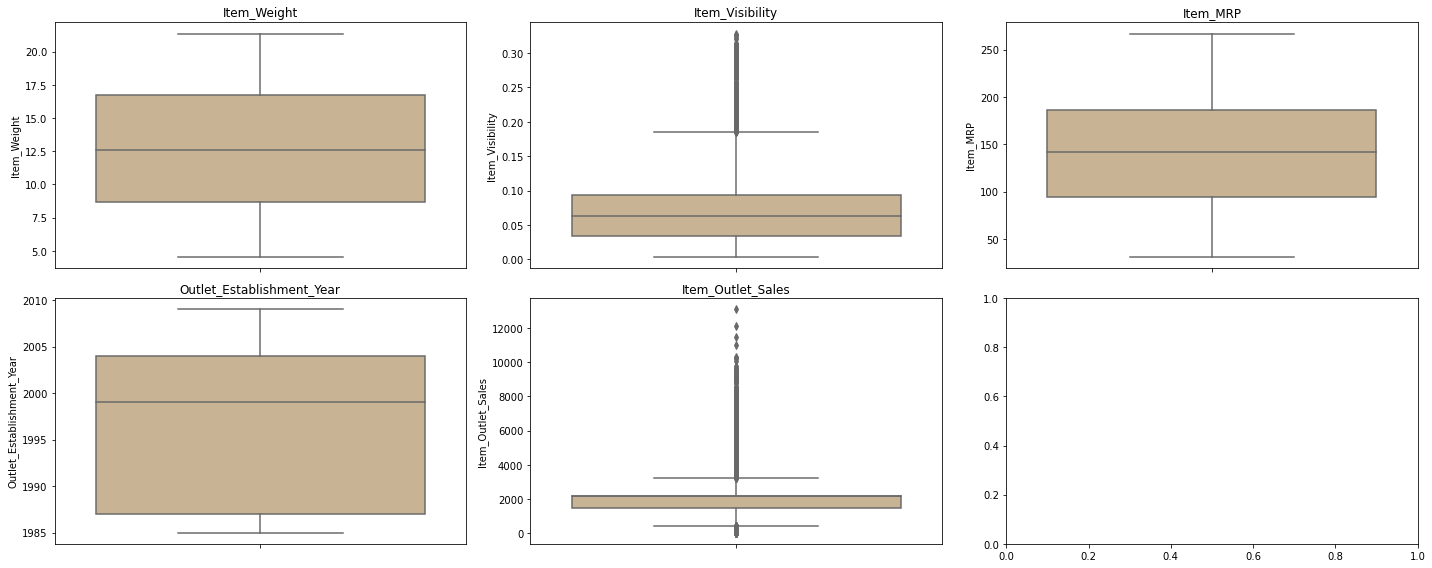

In [89]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=df.select_dtypes(include=numerics) # create dataframe for all numeric type
con_cols=con_df.columns # taking colums 
num_cols=3  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1     #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(y=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

## Interpretation: 
    
    Item weight - Most of the items weight fall in between 8-16 
    Item Visibility - Visibility for most products lie between .4-.10 but some of the product have the visibility of .20+
    Item MRP - Most of the items MRP is in between 100-190
    Establishment - Mostly outlets are established between 1987 - 2003
    Outlest Sales - Sales for most of the product is somewhere around 200
    
    

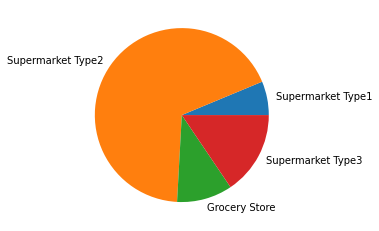

In [135]:
d2=df.groupby('Outlet_Type').sum() #used groupby function to get the total sales Outlet_Type wise 
d2=d2.reset_index()
plt.pie(d2['Item_Outlet_Sales'],labels=list(df['Outlet_Type'].unique()));

### Interpretation: From the above pie chart we can see Supermarket Type2 genrating maximum sales

## Bivariate 

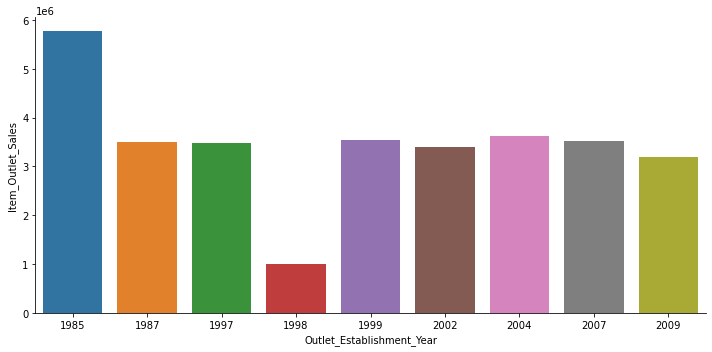

In [91]:
e1 = df.groupby('Outlet_Establishment_Year').sum() #used groupby function to get the total sales , Outlet_Establishment_Year wise
e1.reset_index(inplace=True)
sns.catplot(data = e1, x= 'Outlet_Establishment_Year', y= 'Item_Outlet_Sales', kind = 'bar', ci= False, aspect=2);

### Interpretation: The First Established(1985) outlet is giving higher sales compaired to all other outlet Established after 1985 and least sales are from 1998 ones

## Total sales of different item type

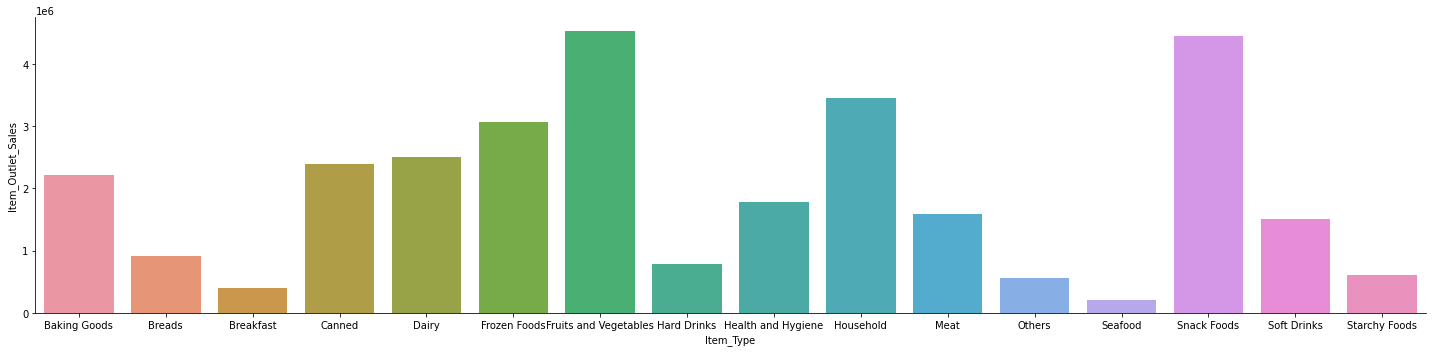

In [93]:
e1 = df.groupby('Item_Type').sum()
e1.reset_index(inplace=True)
sns.catplot(data = e1, x= 'Item_Type', y= 'Item_Outlet_Sales', kind = 'bar', ci= False, aspect=4 );

## Total sales of different item yearly

In [94]:
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def f(Years):
    df1= df[df['Outlet_Establishment_Year'] ==Years]
    e1 = df1.groupby('Item_Type').sum()
    e1.reset_index(inplace=True)
    sns.catplot(data = e1, x= 'Item_Type', y= 'Item_Outlet_Sales', kind = 'bar', ci= False,aspect=4);

interactive_plot = interactive(f, Years = widgets.SelectionSlider(options = df.Outlet_Establishment_Year.unique() ))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(SelectionSlider(description='Years', options=(1999, 2009, 1998, 1987, 1985, 2002, 2007, …

### Interpretation; From the above chart we can see that most of revenue is genrated by these products ['Fruits and Vegitables', 'Snack Food', 'Household', 'Frozen food', 'Dairy','Canned','Baking Goods'] on top of these is Fruits/Vegiee and Snacks 

### Seafoods is giving the least total sales over the years

## how sales if differ by fat content over the year

In [95]:
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def f(Years):
    df1= df[df['Outlet_Establishment_Year'] ==Years]
    e1 = df1.groupby('Item_Fat_Content').sum()
    e1.reset_index(inplace=True)
    sns.catplot(data = e1, x= 'Item_Fat_Content', y= 'Item_Outlet_Sales', kind = 'bar', ci= False);

interactive_plot = interactive(f, Years = widgets.SelectionSlider(options = df.Outlet_Establishment_Year.unique() ))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(SelectionSlider(description='Years', options=(1999, 2009, 1998, 1987, 1985, 2002, 2007, …

### Interpretation = As we can see over the years mostly people consumer low fat produts more then regular ones and low fat products giving us higher revenue

## Multivariate

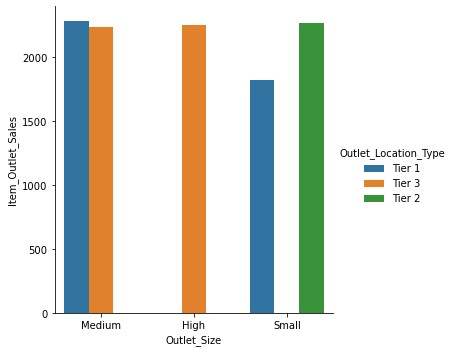

In [136]:
sns.catplot(data = df, x= 'Outlet_Size', y= 'Item_Outlet_Sales', kind = 'bar', ci= False, hue='Outlet_Location_Type');

### Interpretation:Outlet in Tier1 and Tier2 and Tier3 location genrating almost equal amount of sales however if the size of outlet is small then Tier1 location wont give much of Total Sales 

# Data Preprocessing 

In [137]:
label_encoder = preprocessing.LabelEncoder() # to change the categorical value to numeric 
df1['Item_Fat_Content'] = label_encoder.fit_transform(df1['Item_Fat_Content'])
df1['Item_Type'] = label_encoder.fit_transform(df1['Item_Type'])
df1['Outlet_Identifier'] = label_encoder.fit_transform(df1['Outlet_Identifier'])
df1['Outlet_Size'] = label_encoder.fit_transform(df1['Outlet_Size'])
df1['Outlet_Location_Type'] = label_encoder.fit_transform(df1['Outlet_Location_Type'])
df1['Outlet_Type'] = label_encoder.fit_transform(df1['Outlet_Type'])

In [98]:
Final_test = df1[df1['Item_Outlet_Sales'].isna()].drop('Item_Identifier',axis=1) # Droping the Item_Identifier becuase it unique ID and does not corelating with sales 

In [99]:
Final_df = df1[df1['Item_Outlet_Sales'].notnull()].drop('Item_Identifier',axis=1)

# Scaling

In [138]:
X = Final_df.iloc[:,1:10]
y = Final_df.iloc[:,10]
scaler = MinMaxScaler() # to scale the data data between 0-1
X= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333


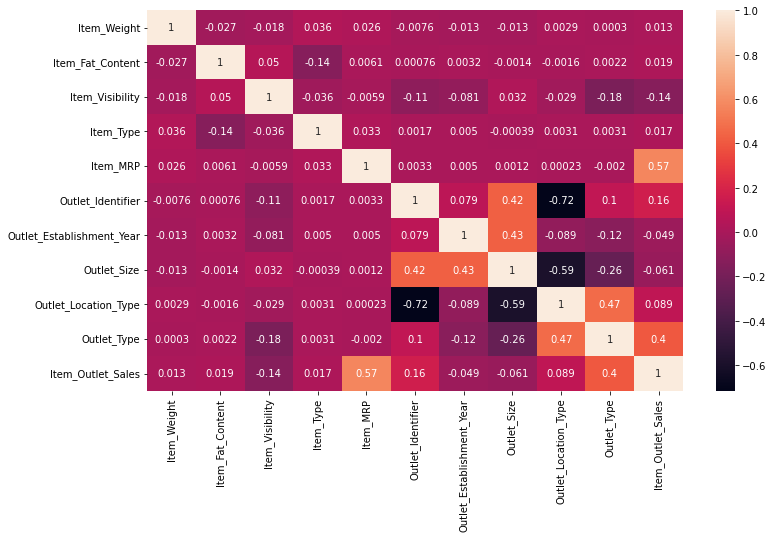

In [101]:
plt.figure(figsize=(12,7))
sns.heatmap(Final_df.corr(),annot=True);

#### from the above heatmap we can see all the features can be considered as mostly they are corelation  

# TEST Train Split

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.7) 

# Base line Model

In [103]:
from sklearn.linear_model import Ridge # Using ridge model to add PENALTY (alpha)

In [104]:
ridge_model = Ridge(alpha = 10)

In [105]:
ridge_model.fit(X_train, y_train) #this contain all the features 

Ridge(alpha=10)

In [106]:
test_prediction = ridge_model.predict(X_test)

In [107]:
s_r_sq=ridge_model.score(X_test, y_test)
print('coefficient of determination:', s_r_sq ,'\n') #to check how well independent variable in model explain the variation in target variable 

coefficient of determination: 0.5025845776078641 



In [127]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,test_prediction)
RMSE = np.sqrt(MSE)
print('MSE',MSE)
print('RMSE',RMSE)

MSE 1403282.068598713
RMSE 1184.6020718362404


### Second Model RdgeCV

In [110]:
from sklearn.linear_model import RidgeCV

In [111]:
ridge_cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0), scoring= 'neg_mean_absolute_error')

In [112]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [113]:
ridge_cv_model.alpha_

10.0

In [114]:
R_test_prediction = ridge_cv_model.predict(X_test)

In [115]:
s_r_sq=ridge_cv_model.score(X_test, y_test)
print('coefficient of determination:', s_r_sq ,'\n')

coefficient of determination: 0.5025845776078629 



In [128]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,R_test_prediction)
RMSE = np.sqrt(MSE)
print('MSE',MSE)
print('RMSE',RMSE)

MSE 1403282.0685987163
RMSE 1184.6020718362417


### Third Model - RandomForestRegressor Using Grid Search

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
model=RandomForestRegressor()

In [120]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")



In [123]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [124]:
grid_search.best_score_ 

0.5916329515648326

In [125]:
G_Prediction_RF = grid_search.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,G_Prediction_RF)
RMSE = np.sqrt(MSE)
print('MSE',MSE)
print('RMSE',RMSE)

MSE 1107034.3900867777
RMSE 1052.1570177909653


### Fourth Model DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

In [46]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [47]:
s_r_sq=dt.score(X_test, y_test)
print('coefficient of determination:', s_r_sq ,'\n')

coefficient of determination: 0.36659679830158143 



In [48]:
params = {
    'max_depth': [2,3,5,7,8,10,20],
    'min_samples_leaf': [5,10,20,40,50,75,85,100,200],
    'max_features':[None,"auto", "sqrt", "log2"]
}
# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv = 6,
                           n_jobs=-1, verbose=1, scoring="r2")

In [49]:
grid_search_1.fit(X_train, y_train)

Fitting 6 folds for each of 252 candidates, totalling 1512 fits


GridSearchCV(cv=6,
             estimator=DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13,
                                             random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 8, 10, 20],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20, 40, 50, 75, 85, 100,
                                              200]},
             scoring='r2', verbose=1)

In [50]:
grid_search_1.best_score_

0.6007749573078556

In [51]:
G_Prediction_DT = grid_search_1.predict(X_test)

In [130]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,G_Prediction_DT)
RMSE = np.sqrt(MSE)
print('MSE',MSE)
print('RMSE',RMSE)

MSE 4684041.275937115
RMSE 2164.2646039560677


### Ensembling - Stacking 

In [52]:
Test_prediction = {
    'RR': test_prediction,
    'R_CV': R_test_prediction,
    'RF_G_Search': G_Prediction_RF,
    'DTR_G_Search': G_Prediction_DT
    
}
Test_prediction  = pd.DataFrame(Test_prediction) 
Test_prediction.head()

,RR,R_CV,RF_G_Search,DTR_G_Search
0,1725.834453,1725.834453,2052.952211,1987.146493
1,4007.828028,4007.828028,4724.874386,4903.544630
2,2354.722023,2354.722023,1857.188389,1987.146493
3,1365.010638,1365.010638,1220.990418,1009.941973
4,800.045608,800.045608,905.571910,1009.941973


In [53]:
from sklearn.linear_model import LinearRegression
smodel = LinearRegression()

In [54]:
smodel.fit(Test_prediction,y_test)

LinearRegression()

In [55]:
smodel.score(Test_prediction,y_test)

0.5906043320480103

In [56]:
final_prediction = smodel.predict(Test_prediction) 
final_prediction 

array([2088.28479332, 4634.99528042, 1791.52016282, ..., 3502.89579745,
        299.2463113 ,  301.15327822])

## After Comparing Accuracy of Different Model We got to know that best accuracy we are getting Stacking 

## So we consider 'smodel' is our final model for Prediction

In [57]:
from sklearn.ensemble import StackingRegressor

In [58]:
estimators = [
    ('lr', ridge_model),
    ('r_cv', ridge_cv_model),
    ('rfr',grid_search),
    ('dt',grid_search_1)
]

In [59]:
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    n_jobs=-1,
)

In [60]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', Ridge(alpha=10)),
                              ('r_cv',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       scoring='neg_mean_absolute_error')),
                              ('rfr',
                               GridSearchCV(cv=4,
                                            estimator=RandomForestRegressor(),
                                            n_jobs=-1,
                                            param_grid={'max_depth': [2, 3, 5,
                                                                      10, 20],
                                                        'min_samples_leaf': [5,
                                                                             10,
                                                                             20,
                                                                             50,
                                                      

In [61]:
reg.score(X_test, y_test)

0.5866169721391299

In [62]:
predictions = reg.predict(X_test)
predictions

array([2037.00271303, 4925.98979911, 1886.59596676, ..., 3734.82052589,
        308.33259781,  313.61155256])

In [63]:
reg.score(X_test, y_test) # gives R^2

0.5866169721391299

In [131]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
print('MSE',MSE)
print('RMSE',RMSE)

MSE 4732986.306986475
RMSE 2175.542761470451


In [64]:
reg.predict(X_test)

array([2037.00271303, 4925.98979911, 1886.59596676, ..., 3734.82052589,
        308.33259781,  313.61155256])

# Predition on unknown data

In [65]:
scaler = MinMaxScaler()
Final_test= pd.DataFrame(scaler.fit_transform(Final_test), columns = Final_test.columns)
Final_test = Final_test.iloc[:,1:10]
reg.predict(Final_test)

C:\Users\yogesh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\yogesh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


array([1587.95521208, 1428.8408941 ,  611.96497424, ..., 1902.70482785,
       3669.42346599, 1152.04276269])

# Feature Importance 

In [66]:
from sklearn.inspection import  permutation_importance

In [67]:
a = permutation_importance(reg,X_test,y_test).importances_mean
b=X_test.columns

In [68]:
pd.DataFrame(a,b,columns=['Feature Importance'])

,Feature Importance
Item_Fat_Content,-0.000132
Item_Visibility,-0.000077
Item_Type,0.000017
Item_MRP,0.740532
Outlet_Identifier,-0.000335
Outlet_Establishment_Year,0.028122
Outlet_Size,-0.000104
Outlet_Location_Type,-0.000526
Outlet_Type,0.524787


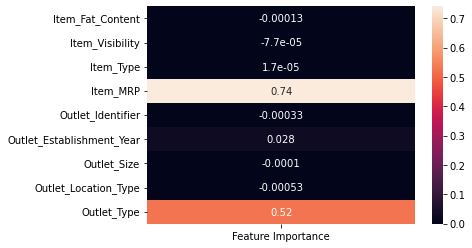

In [69]:
sns.heatmap(pd.DataFrame(a,b,columns=['Feature Importance']),annot=True);

# Bunisess Solution

### From the above model we have predicted the sales of diffrent products which were not available earlier. 

### The factors that mostly affecting the sales is Item MRP, Fat Contant, Location of outlet.

### If outlet is Supermarket Type2 in Tier one location and have the product which contain low fat mostly fruits/Vegiee including household product and snack foods with MRP of 110-190 there will be chances of higher sales 

# Predicted sales

In [70]:
reg.predict(Final_test) 

array([1587.95521208, 1428.8408941 ,  611.96497424, ..., 1902.70482785,
       3669.42346599, 1152.04276269])